In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('/gdrive/MyDrive/Regression_no_outliers_cleaned_data_01.csv')

In [4]:
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [5]:
df['sumDelays'] = df['carrier_delay'] + df['weather_delay'] + df['nas_delay']+ df['security_delay']+ df['late_aircraft_delay']

In [6]:
df['crs_arr_time'] = df['crs_arr_time'].astype(float).astype(int).apply(lambda x: '{0:0>4}'.format(x)).astype(str)

In [7]:
def crs_dep(row):
  if row['crs_dep_time'] < 0:
    return 2400 + row['crs_dep_time']
  else:
    return row['crs_dep_time']

In [8]:
df

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,dep_time,dep_delay,dest,arr_time,arr_delay,crs_arr_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day,weekday,sumDelays
0,2018-08-26,AS,AS,PDX,1717.0,-3.0,LAX,1936.0,-5.0,1941,139.0,834.0,0.0,0.0,0.0,0.0,0.0,2018,8,26,1.0,0.0
1,2018-05-24,UA,OO,DEN,1750.0,0.0,PSP,1913.0,3.0,1910,143.0,776.0,0.0,0.0,0.0,0.0,0.0,2018,5,24,0.0,0.0
2,2019-01-10,AA,PT,CLT,1105.0,-4.0,ROA,1200.0,-16.0,1216,55.0,155.0,0.0,0.0,0.0,0.0,0.0,2019,1,10,0.0,0.0
3,2018-07-09,WN,WN,ELP,554.0,-1.0,LAS,623.0,-12.0,0635,89.0,583.0,0.0,0.0,0.0,0.0,0.0,2018,7,9,0.0,0.0
4,2019-07-09,DL,9E,LGA,1629.0,0.0,BNA,1759.0,-12.0,1811,150.0,764.0,0.0,0.0,0.0,0.0,0.0,2019,7,9,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978871,2018-08-29,AA,AA,DCA,1223.0,-7.0,BOS,1343.0,-17.0,1400,80.0,399.0,0.0,0.0,0.0,0.0,0.0,2018,8,29,0.0,0.0
978872,2018-02-11,UA,OO,DCA,2043.0,3.0,ORD,2144.0,-15.0,2159,121.0,612.0,0.0,0.0,0.0,0.0,0.0,2018,2,11,1.0,0.0
978873,2018-10-29,WN,WN,SFO,1926.0,-9.0,SAN,2054.0,-16.0,2110,88.0,447.0,0.0,0.0,0.0,0.0,0.0,2018,10,29,0.0,0.0
978874,2019-03-28,UA,UA,EWR,1658.0,-5.0,MCO,1945.0,-8.0,1953,167.0,937.0,0.0,0.0,0.0,0.0,0.0,2019,3,28,0.0,0.0


In [9]:
df['crs_arr_hour'] = df['crs_arr_time'].astype(str).str[:2].astype(int)

In [10]:
df

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,dep_time,dep_delay,dest,arr_time,arr_delay,crs_arr_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day,weekday,sumDelays,crs_arr_hour
0,2018-08-26,AS,AS,PDX,1717.0,-3.0,LAX,1936.0,-5.0,1941,139.0,834.0,0.0,0.0,0.0,0.0,0.0,2018,8,26,1.0,0.0,19
1,2018-05-24,UA,OO,DEN,1750.0,0.0,PSP,1913.0,3.0,1910,143.0,776.0,0.0,0.0,0.0,0.0,0.0,2018,5,24,0.0,0.0,19
2,2019-01-10,AA,PT,CLT,1105.0,-4.0,ROA,1200.0,-16.0,1216,55.0,155.0,0.0,0.0,0.0,0.0,0.0,2019,1,10,0.0,0.0,12
3,2018-07-09,WN,WN,ELP,554.0,-1.0,LAS,623.0,-12.0,0635,89.0,583.0,0.0,0.0,0.0,0.0,0.0,2018,7,9,0.0,0.0,6
4,2019-07-09,DL,9E,LGA,1629.0,0.0,BNA,1759.0,-12.0,1811,150.0,764.0,0.0,0.0,0.0,0.0,0.0,2019,7,9,0.0,0.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978871,2018-08-29,AA,AA,DCA,1223.0,-7.0,BOS,1343.0,-17.0,1400,80.0,399.0,0.0,0.0,0.0,0.0,0.0,2018,8,29,0.0,0.0,14
978872,2018-02-11,UA,OO,DCA,2043.0,3.0,ORD,2144.0,-15.0,2159,121.0,612.0,0.0,0.0,0.0,0.0,0.0,2018,2,11,1.0,0.0,21
978873,2018-10-29,WN,WN,SFO,1926.0,-9.0,SAN,2054.0,-16.0,2110,88.0,447.0,0.0,0.0,0.0,0.0,0.0,2018,10,29,0.0,0.0,21
978874,2019-03-28,UA,UA,EWR,1658.0,-5.0,MCO,1945.0,-8.0,1953,167.0,937.0,0.0,0.0,0.0,0.0,0.0,2019,3,28,0.0,0.0,19


In [11]:
df['Weekday'] = pd.to_datetime(df['fl_date']).dt.dayofweek

In [12]:
df['Season']= (pd.to_datetime(df['fl_date']).dt.month - 1) // 3

In [13]:
df

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,dep_time,dep_delay,dest,arr_time,arr_delay,crs_arr_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day,weekday,sumDelays,crs_arr_hour,Weekday,Season
0,2018-08-26,AS,AS,PDX,1717.0,-3.0,LAX,1936.0,-5.0,1941,139.0,834.0,0.0,0.0,0.0,0.0,0.0,2018,8,26,1.0,0.0,19,6,2
1,2018-05-24,UA,OO,DEN,1750.0,0.0,PSP,1913.0,3.0,1910,143.0,776.0,0.0,0.0,0.0,0.0,0.0,2018,5,24,0.0,0.0,19,3,1
2,2019-01-10,AA,PT,CLT,1105.0,-4.0,ROA,1200.0,-16.0,1216,55.0,155.0,0.0,0.0,0.0,0.0,0.0,2019,1,10,0.0,0.0,12,3,0
3,2018-07-09,WN,WN,ELP,554.0,-1.0,LAS,623.0,-12.0,0635,89.0,583.0,0.0,0.0,0.0,0.0,0.0,2018,7,9,0.0,0.0,6,0,2
4,2019-07-09,DL,9E,LGA,1629.0,0.0,BNA,1759.0,-12.0,1811,150.0,764.0,0.0,0.0,0.0,0.0,0.0,2019,7,9,0.0,0.0,18,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978871,2018-08-29,AA,AA,DCA,1223.0,-7.0,BOS,1343.0,-17.0,1400,80.0,399.0,0.0,0.0,0.0,0.0,0.0,2018,8,29,0.0,0.0,14,2,2
978872,2018-02-11,UA,OO,DCA,2043.0,3.0,ORD,2144.0,-15.0,2159,121.0,612.0,0.0,0.0,0.0,0.0,0.0,2018,2,11,1.0,0.0,21,6,0
978873,2018-10-29,WN,WN,SFO,1926.0,-9.0,SAN,2054.0,-16.0,2110,88.0,447.0,0.0,0.0,0.0,0.0,0.0,2018,10,29,0.0,0.0,21,0,3
978874,2019-03-28,UA,UA,EWR,1658.0,-5.0,MCO,1945.0,-8.0,1953,167.0,937.0,0.0,0.0,0.0,0.0,0.0,2019,3,28,0.0,0.0,19,3,0


In [14]:
df['mean_origin_weekday'] = df.groupby(['origin','dest','Season','Weekday','op_unique_carrier','crs_arr_hour'])['sumDelays'].transform('mean')

In [15]:
df = df.drop(['fl_date','mkt_unique_carrier','carrier_delay','dep_delay',	'actual_elapsed_time','weather_delay', 	'nas_delay', 	'security_delay', 'late_aircraft_delay'],axis=1)

In [16]:
testDF = df.drop(['distance','day','year','dep_time','sumDelays','arr_time','crs_arr_time','weekday'],axis=1)

In [17]:
testDF

,op_unique_carrier,origin,dest,arr_delay,month,crs_arr_hour,Weekday,Season,mean_origin_weekday
0,AS,PDX,LAX,-5.0,8,19,6,2,6.278970
1,OO,DEN,PSP,3.0,5,19,3,1,9.147059
2,PT,CLT,ROA,-16.0,1,12,3,0,13.214286
3,WN,ELP,LAS,-12.0,7,6,0,2,15.242424
4,9E,LGA,BNA,-12.0,7,18,1,2,10.672727
...,...,...,...,...,...,...,...,...,...
978871,AA,DCA,BOS,-17.0,8,14,2,2,23.544343
978872,OO,DCA,ORD,-15.0,2,21,6,0,12.763359
978873,WN,SFO,SAN,-16.0,10,21,0,3,12.614094
978874,UA,EWR,MCO,-8.0,3,19,3,0,15.521401


In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
testDF['op_unique_carrier']= le.fit_transform(testDF['op_unique_carrier'])

In [19]:
testDF['origin']= le.fit_transform(testDF['origin'])

In [20]:
testDF['dest']= le.fit_transform(testDF['dest'])

In [21]:
testDF

,op_unique_carrier,origin,dest,arr_delay,month,crs_arr_hour,Weekday,Season,mean_origin_weekday
0,2,242,178,-5.0,8,19,6,2,6.278970
1,16,86,257,3.0,5,19,3,1,9.147059
2,17,66,272,-16.0,1,12,3,0,13.214286
3,21,102,176,-12.0,7,6,0,2,15.242424
4,0,187,41,-12.0,7,18,1,2,10.672727
...,...,...,...,...,...,...,...,...,...
978871,1,85,43,-17.0,8,14,2,2,23.544343
978872,16,85,234,-15.0,2,21,6,0,12.763359
978873,21,290,278,-16.0,10,21,0,3,12.614094
978874,19,108,199,-8.0,3,19,3,0,15.521401


In [22]:
X,y = testDF.drop('arr_delay',axis=1),testDF['arr_delay']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
pca = PCA()
scaler = StandardScaler()
X=scaler.fit_transform(X)
pca.fit_transform(X)

array([[-0.67593321, -0.51703473,  0.0615671 , ...,  0.1745262 ,
         1.13805668,  0.0182511 ],
       [ 0.63756334,  0.53912352,  1.02359837, ..., -1.05026317,
        -0.49896118, -0.00898633],
       [ 2.13794174,  0.61712141,  0.5203309 , ..., -1.4626624 ,
        -0.41601006,  0.18456891],
       ...,
       [-1.61029601,  2.11412905,  0.00969304, ...,  0.08780953,
         0.36138415,  0.21901553],
       [ 1.75919178,  0.77426002,  0.88538932, ..., -0.1178876 ,
        -0.81622533, -0.23152945],
       [ 0.57631005, -0.72875995,  0.10919119, ...,  0.21090291,
        -1.30436618, -0.0100578 ]])

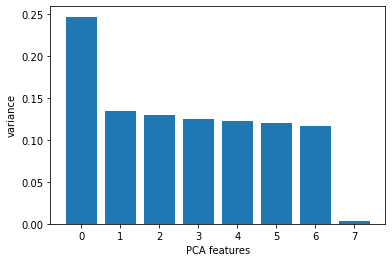

In [27]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.show()

In [28]:
pca = PCA(n_components=8)
pca.fit(X)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score 
from sklearn.model_selection import GridSearchCV
import xgboost as xg

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
import lightgbm

In [32]:
model = lightgbm.LGBMRegressor()

In [33]:
model.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [34]:
y_pred = model.predict(X_test)

In [35]:
print('mean_squared_error:', mean_squared_error(y_test,y_pred))
print('RSME:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score:', r2_score(y_test,y_pred))
print('Adjusted R2 value:', 1 - (1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

mean_squared_error: 1976.4070737030013
RSME: 44.45680008393543
r2 score: 0.03415656679640078
Adjusted R2 value: 0.034130254376118385


In [36]:
print('mean_squared_error:', mean_squared_error(y_test,y_pred))
print('RSME:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score:', r2_score(y_test,y_pred))
print('Adjusted R2 value:', 1 - (1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

mean_squared_error: 1976.4070737030013
RSME: 44.45680008393543
r2 score: 0.03415656679640078
Adjusted R2 value: 0.034130254376118385
